# Mini Project 5-4 Explore confidence intervals

## Introduction

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above. <br>

You've just started your new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). **RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.** You've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis:
1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

## Step 1: Imports

### Import packages

Import `pandas` and `numpy`.

In [2]:
# Import relevant packages
import numpy as np
import pandas as pd
from scipy import stats

### Load the dataset

The dataset provided gives national Air Quality Index (AQI) measurements by state over time.  `Pandas` is used to import the file `c4_epa_air_quality.csv` as a DataFrame named `aqi`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

*Note: For the purposes of your analysis, you can assume this data is randomly sampled from a larger population.*

In [3]:
# Import data
aqi = pd.read_csv('modified_c4_epa_air_quality.csv')
aqi = aqi.dropna()

## Step 2: Data exploration

### Explore your dataset

Before proceeding to your deliverables, spend some time exploring the `aqi` DataFrame. 

In [4]:
# Code Here
aqi.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910
10,2018-01-01,Minnesota,Dakota,Rosemount,Flint Hills Refinery 420,Carbon monoxide,Parts per million,1.386294


In [5]:
# Code Here
aqi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257 entries, 0 to 259
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_local        257 non-null    object 
 1   state_name        257 non-null    object 
 2   county_name       257 non-null    object 
 3   city_name         257 non-null    object 
 4   local_site_name   257 non-null    object 
 5   parameter_name    257 non-null    object 
 6   units_of_measure  257 non-null    object 
 7   aqi_log           257 non-null    float64
dtypes: float64(1), object(7)
memory usage: 18.1+ KB


In [6]:
# Code Here
aqi.describe()

,aqi_log
count,257.000000
mean,1.768918
std,0.716498
min,0.000000
25%,1.098612
50%,1.791759
75%,2.302585
max,3.931826


**Question:** What time range does this data cover?

In [7]:
# Code Here
# Convert 'date_local' column to datetime format if it's not already
aqi['date_local'] = pd.to_datetime(aqi['date_local'])

# Find the minimum and maximum dates
start_date = aqi['date_local'].min()
end_date = aqi['date_local'].max()

print(f"Time Range: {start_date} to {end_date}")


Time Range: 2018-01-01 00:00:00 to 2018-01-01 00:00:00


A:

**Question:** What are the minimum and maximum AQI values observed in the dataset?

In [8]:
# Code 
min_aqi=aqi['aqi_log'].min()
max_aqi=aqi['aqi_log'].max()

print(f"min aqi is:{min_aqi}")
print(f"max aqi is {max_aqi}")

min aqi is:0.0
max aqi is 3.9318256327243257


**Question:** Are all states equally represented in the dataset?

In [9]:
# Code Here
# Count occurrences of each state
state_counts = aqi['state_name'].value_counts()

# Convert to DataFrame for better visualization
state_counts_df = pd.DataFrame({'State': state_counts.index, 'Count': state_counts.values})

# Display the table
print(state_counts_df)

                   State  Count
0             California     66
1                Arizona     14
2                   Ohio     12
3                Florida     12
4                  Texas     10
5               New York     10
6           Pennsylvania      9
7               Colorado      9
8               Michigan      9
9              Minnesota      7
10            New Jersey      6
11               Indiana      5
12         Massachusetts      4
13              Oklahoma      4
14        North Carolina      4
15                Nevada      4
16              Maryland      4
17           Connecticut      4
18              Virginia      4
19                  Utah      3
20               Vermont      3
21              Illinois      3
22              Missouri      3
23                Hawaii      3
24                  Iowa      3
25               Wyoming      3
26              Kentucky      3
27                Alaska      2
28          Rhode Island      2
29               Georgia      2
30      

In [ ]:
# No it's represented unequally

A:

## Step 3: Statistical tests

### Summarize the mean AQI for RRE states

Start with your first deliverable. Summarize the mean AQI for the states in which RRE operates (California, Florida, Michigan, Ohio, Pennsylvania, and Texas).

In [10]:
# Summarize the mean AQI for RRE states.

# Create a list of RRE states.
rre_states = ["California", "Florida", "Michigan", "Ohio", "Pennsylvania", "Texas"]

# Subset the data to only include rows where the state is in the RRE list
rre_data = aqi[aqi['state_name'].isin(rre_states)]

# Compute the mean AQI for each RRE state and alias it as 'aqi_rre'
aqi_rre = rre_data.groupby("state_name")['aqi_log'].mean().reset_index()

# Rename the column for clarity
aqi_rre.rename(columns={'aqi_log': 'Mean_AQI'}, inplace=True)

# Display the table
print(aqi_rre.rename)


# Find the mean aqi for each of the RRE states.
 #alias as aqi_rre

<bound method DataFrame.rename of      state_name  Mean_AQI
0    California  2.413149
1       Florida  1.782627
2      Michigan  2.132079
3          Ohio  1.428586
4  Pennsylvania  1.275564
5         Texas  1.283000>


### Construct a boxplot visualization for the AQI of these states

Seaborn is a simple visualization library, commonly imported as `sns`. Import `seaborn`. Then utilize a boxplot visualization from this library to compare the distributions of AQI scores by state.

In [11]:
# Import seaborn as sns.
!pip install seaborn
import seaborn as sns


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Create an in-line visualization showing the distribution of `aqi` by `state_name`

Now, create an in-line visualization showing the distribution of `aqi` by `state_name`.

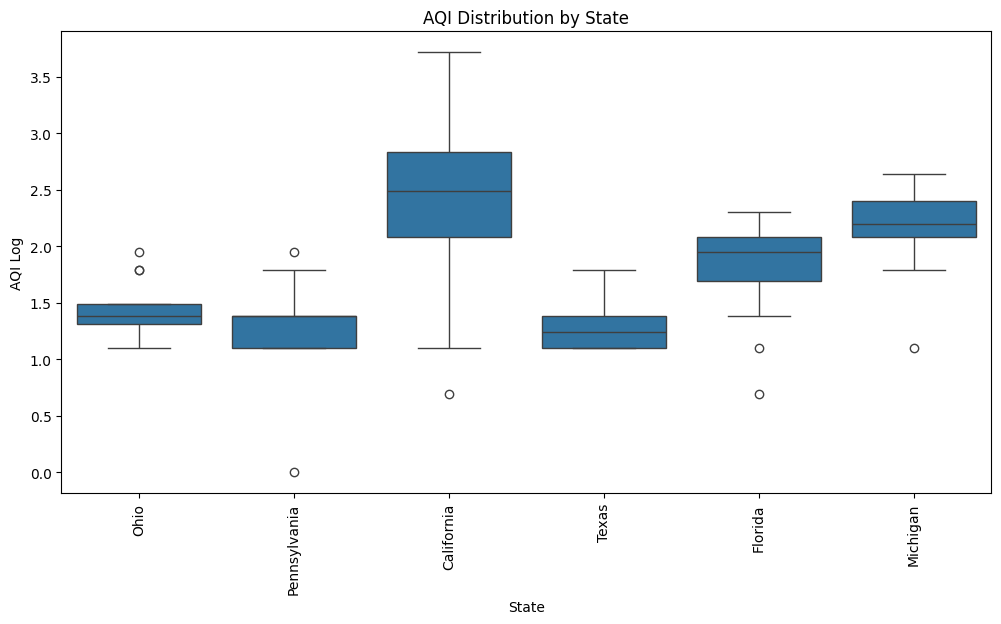

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12,6))

# Use full dataset, not aggregated data
sns.boxplot(x='state_name', y='aqi_log', data=rre_data)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Add titles and labels
plt.title("AQI Distribution by State")
plt.xlabel("State")
plt.ylabel("AQI Log")

# Show the plot
plt.show()


**Question:** Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?

A:California

### Construct a confidence interval for the RRE state with the highest mean AQI

Recall the 4-step process in constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

### Construct your sample statistic

To contruct your sample statistic, find the mean AQI for CA.

In [14]:
# Find the mean aqi for CA state.
ca_data = aqi[aqi['state_name']== "California"]


# Compute the mean AQI for California
mean_aqi_ca = ca_data['aqi_log'].mean()

print(f"Mean AQI for California: {mean_aqi_ca}")


Mean AQI for California: 2.413148768367913


### Choose your confidence level

Choose your confidence level for your analysis. The most typical confidence level chosen is 95%; however, you can choose 90% or 99% if you want decrease or increase (respectively) your level of confidence about your result.

In [ ]:
# Input your confidence level here:
0.95

### Find your margin of error (ME)

Recall **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

- Find your z-value. 
- Find the approximate z for common confidence levels.
- Calculate your **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [16]:
# Calculate your margin of error.

# Begin by identifying the z associated with your chosen confidence level.

z_value = 1.96

# Next, calculate your standard error.
stadard_error = ca_data['aqi_log'].std() / np.sqrt(len(ca_data))

# Lastly, use the preceding result to calculate your margin of error.
margin_of_error = z_value * stadard_error
print(f"Margin of Error: {margin_of_error}")


Margin of Error: 0.14533720746088516


### Calculate your interval

Calculate both a lower and upper limit surrounding your sample mean to create your interval.

In [17]:
# Calculate your confidence interval (upper and lower limits).
# Compute confidence interval
lower_bound = mean_aqi_ca - margin_of_error
upper_bound = mean_aqi_ca + margin_of_error

# Print results
print(f"Sample Mean: {mean_aqi_ca:.4f}")
print(f"Margin of Error: {margin_of_error:.4f}")
print(f"95% Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")

Sample Mean: 2.4131
Margin of Error: 0.1453
95% Confidence Interval: (2.2678, 2.5585)


### Alternative: Construct the interval using `scipy.stats.norm.interval()`

`scipy` presents a simpler solution to developing a confidence interval. To use this, first import the `stats` module from `scipy`.

In [20]:
# Import stats from scipy.

## Step 4: Results and evaluation

### Recalculate your confidence interval

Provide your chosen `confidence_level`, `sample_mean`, and `standard_error` to `stats.norm.interval()` and recalculate your confidence interval.

In [18]:
# Code Here
stats.norm.interval(0.95, loc=mean_aqi_ca, scale=stadard_error)

(np.float64(2.2678142315123204), np.float64(2.5584833052235054))

# Considerations

**What are some key takeaways that you learned from this project?**

A:I can use stats.norm.interval to calculate confidence interval

**What findings would you share with others?**

A:That using stats.norm.interval() is the fasttest way to calculate confidence interval.

**What would you convey to external readers?**

A:

**References**

[seaborn.boxplot — seaborn 0.12.1 documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). (n.d.). 